In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from glob import glob

%matplotlib inline

In [2]:
# Directory of spectrograms
data_dir = 'data_images/'

In [3]:
# List contents
os.listdir(data_dir)

['blues', 'house', 'metal_death', 'metal_heavy', 'rnb']

In [4]:
from tensorflow.keras.preprocessing.image import load_img

In [19]:
# Load png files and label them for training
blues = glob(data_dir + 'blues/*')
metal = glob(data_dir + 'metal_death/*')

data = []
labels = []

for i in blues:   
    image = load_img(i, color_mode='grayscale', 
    target_size = (100,100))
    image = np.array(image)
    data.append(image)
    labels.append(0)
for i in metal:   
    image = load_img(i, color_mode='grayscale', 
    target_size = (100,100))
    image = np.array(image)
    data.append(image)
    labels.append(1)
    
data = np.array(data)
labels = np.array(labels)

In [20]:
data.max()

255

In [21]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3,
                                                random_state=42)

In [22]:
# Scale features
X_train = X_train/255
X_test = X_test/255

In [23]:
len(X_train)

2019

In [24]:
len(X_test)

866

In [25]:
# Reshape with additional feature dimension
X_train = X_train.reshape(len(X_train), 100, 100, 1)
X_test = X_test.reshape(len(X_test), 100, 100, 1)

In [26]:
X_train.shape

(2019, 100, 100, 1)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [140]:
# Create CNN model
model = Sequential()

#model.add(Conv2D(filters=8, kernel_size=(3,3),input_shape=(100,100,1), activation='relu',))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=(100,100,1), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(100,100,1), activation='relu',))
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(100,100,1), activation='relu',))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

#model.add(Dense(8))
model.add(Dense(32))
#model.add(Dense(64))
#model.add(Dense(128))
model.add(Activation('relu'))
# Prevent overfitting
model.add(Dropout(0.5))

# Output
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [141]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 98, 98, 16)        160       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 49, 49, 16)        0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 38416)             0         
_________________________________________________________________
dense_36 (Dense)             (None, 32)                1229344   
_________________________________________________________________
activation_36 (Activation)   (None, 32)                0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 1)               

In [129]:
from tensorflow.keras.callbacks import EarlyStopping
from tqdm.keras import TqdmCallback

In [130]:
# Prevent overfitting
early_stop = EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)

In [131]:
# Train model
model.fit(x=X_train,y=y_train,
          batch_size=32,
          epochs=100,
          validation_data=(X_test,y_test),
          verbose=0,
          callbacks=[early_stop,TqdmCallback(verbose=1)])

In [132]:
losses = pd.DataFrame(model.history.history)

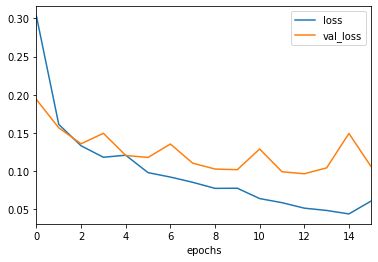

In [133]:
fig = plt.figure()
ax = fig.gca()
losses[['loss','val_loss']].plot(ax=ax)
#ax.set_xticks(range(0,12,2))
ax.set_xlabel('epochs')
plt.savefig('blog_pictures/210124_binary_advanced_loss.png',dpi=150,bbox_inches='tight')

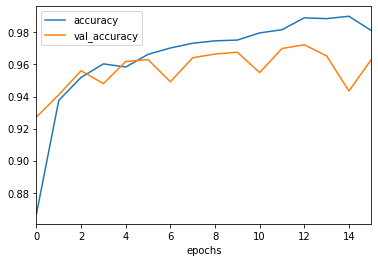

In [134]:
fig = plt.figure()
ax = fig.gca()
losses[['accuracy','val_accuracy']].plot(ax=ax)
#ax.set_xticks(range(0,12,2))
ax.set_xlabel('epochs')
plt.savefig('blog_pictures/210124_binary_advanced_accu.png',dpi=150,bbox_inches='tight')

In [135]:
# model.save('CNN_binary__blues_metal_210104.h5')

In [136]:
from sklearn.metrics import classification_report,confusion_matrix

In [137]:
predictions = model.predict_classes(X_test)

In [138]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       446
           1       0.98      0.96      0.97       420

    accuracy                           0.97       866
   macro avg       0.97      0.97      0.97       866
weighted avg       0.97      0.97      0.97       866



In [139]:
confusion_matrix(y_test,predictions)

array([[438,   8],
       [ 16, 404]], dtype=int64)

In [64]:
# Test example file
num = 2437
random_image = X_test[num]
print( model.predict_classes(random_image.reshape(1,100,100,1))[0] )
print(y_test[num])

[1]
1
